In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(filepath, header=0)

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

#### Create LR Object

In [ ]:
lm=LinearRegression()
lm

LinearRegression()

#### How could 'highway-mgp' help us predict car price?

In [ ]:
X=df[['highway-mpg']]
Y=df[['price']]

In [ ]:
lm.fit(X,Y)

LinearRegression()

In [ ]:
Yhat=lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [ ]:
lm.intercept_

array([38423.30585816])

In [ ]:
lm.coef_

array([[-821.73337832]])

## Question 1(a):
Create a linear regression object called "lnm1".

In [ ]:
lm1=LinearRegression()
lm1

LinearRegression()

## Question 1(b):
Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [ ]:
lm1.fit(df[['engine-size']],df[['price']])
lm1

LinearRegression()

## Question 1(c):
Find the slope and intercept of the model.

In [ ]:
lm1.intercept_

array([-7963.33890628])

In [ ]:
lm1.coef_

array([[166.86001569]])

## Question 1(d):
What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".

In [ ]:
Yhat=-7963.34+166.86*X
Yhat

,highway-mpg
0,-3458.12
1,-3458.12
2,-3624.98
3,-2957.54
4,-4292.42
...,...
196,-3291.26
197,-3791.84
198,-4125.56
199,-3458.12


In [ ]:
price=-7963.34+166.86*df['engine-size']
price

0      13728.46
1      13728.46
2      17399.38
3      10224.40
4      14729.62
         ...   
196    15563.92
197    15563.92
198    20903.44
199    16231.36
200    15563.92
Name: engine-size, Length: 201, dtype: float64

# **Multiple Linear Regression**

In [ ]:
Z=df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [ ]:
lm.fit(Z,df['price'])

LinearRegression()

In [ ]:
lm.intercept_

-15806.62462632922

In [ ]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

## Question 2(a):
Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

In [ ]:
lm2=LinearRegression()
lm2.fit(df[['normalized-losses','highway-mpg']],df['price'])

LinearRegression()

## Question 2(b):
Find the coefficient of the model.

In [ ]:
lm2.coef_

array([   1.49789586, -820.45434016])

# **Model Evaluation Using Visualization**

In [ ]:
import seaborn as sns
%matplotlib inline

## Regression Plot

(0.0, 48169.37139725833)

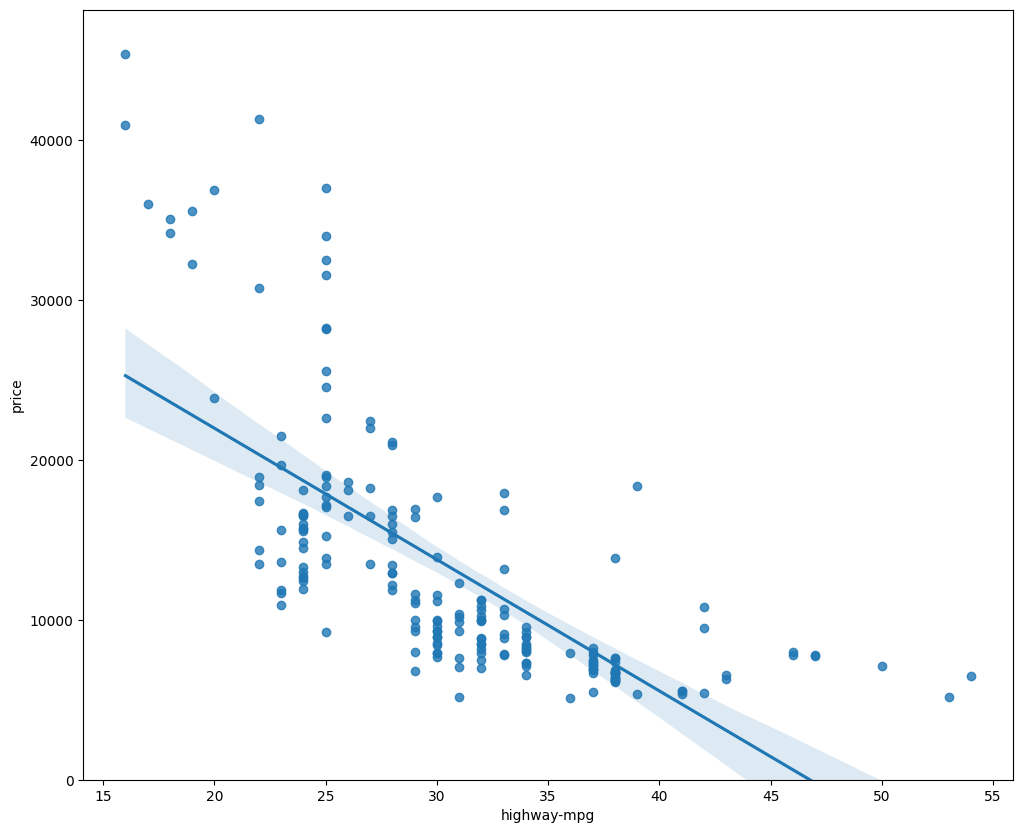

In [ ]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

(0.0, 47414.1)

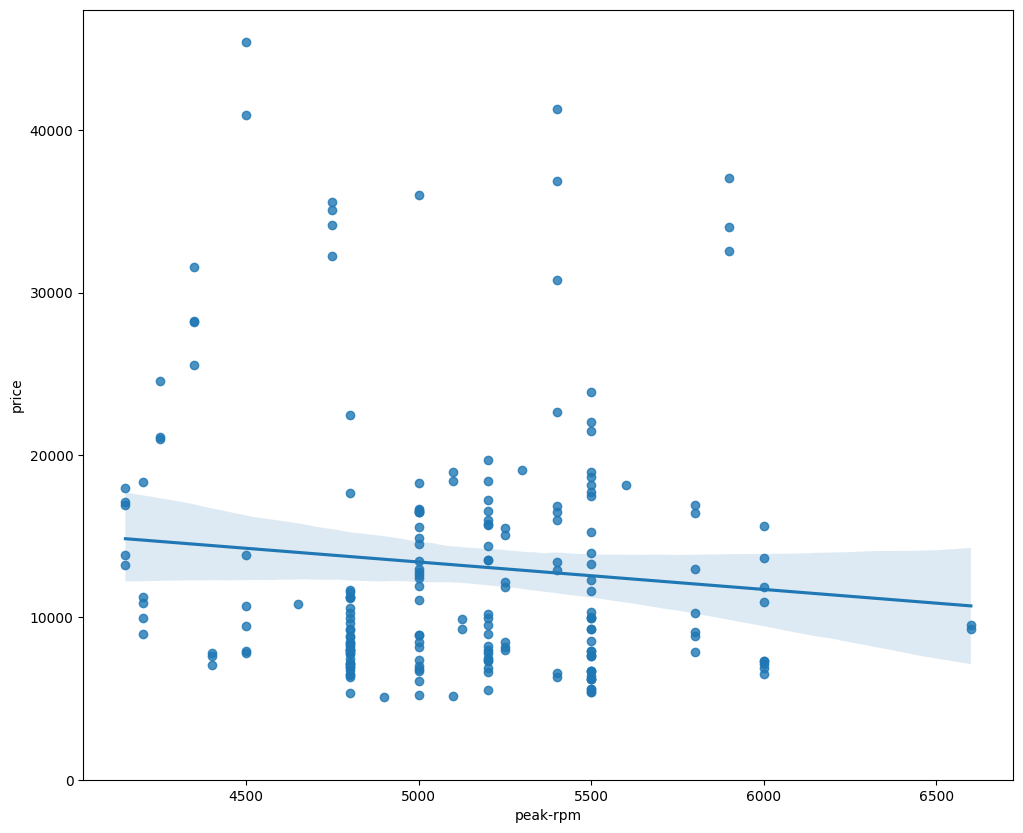

In [ ]:
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

### Question 3:
Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

In [ ]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


## Residual Plot

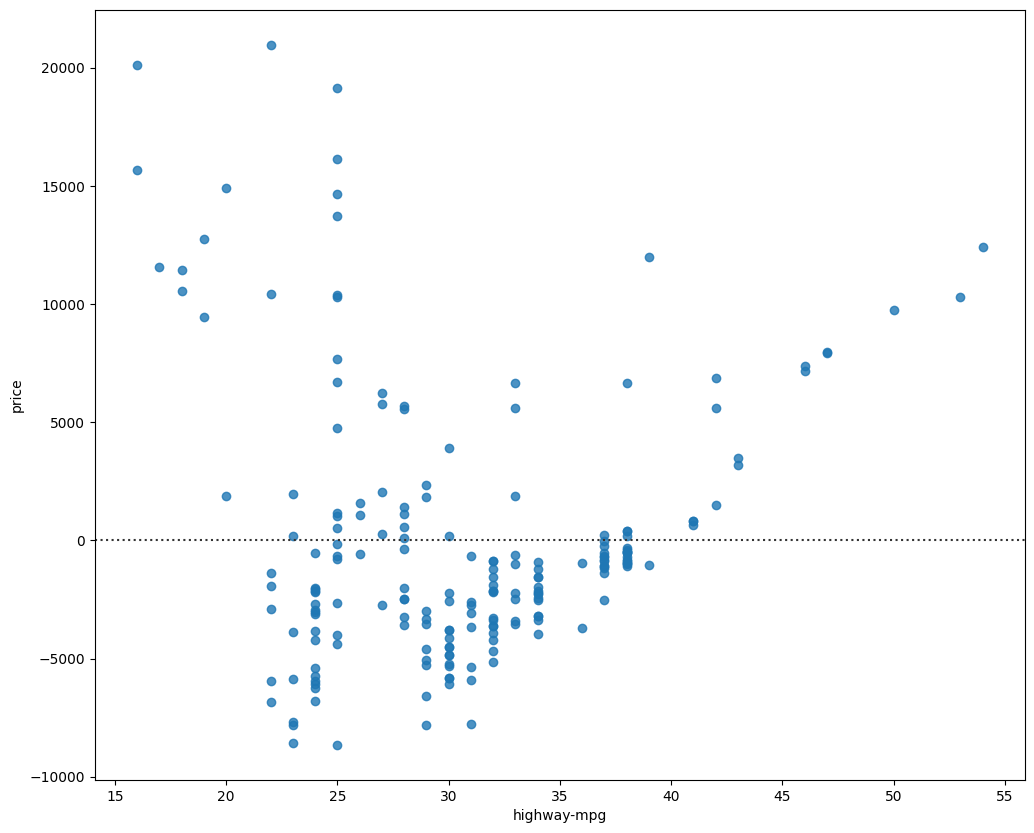

In [ ]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

#Non Linear model is more appropriate for this data

In [ ]:
Y_hat=lm.predict(Z)

<ipython-input-41-7377bca648c1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-41-7377bca648c1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" 

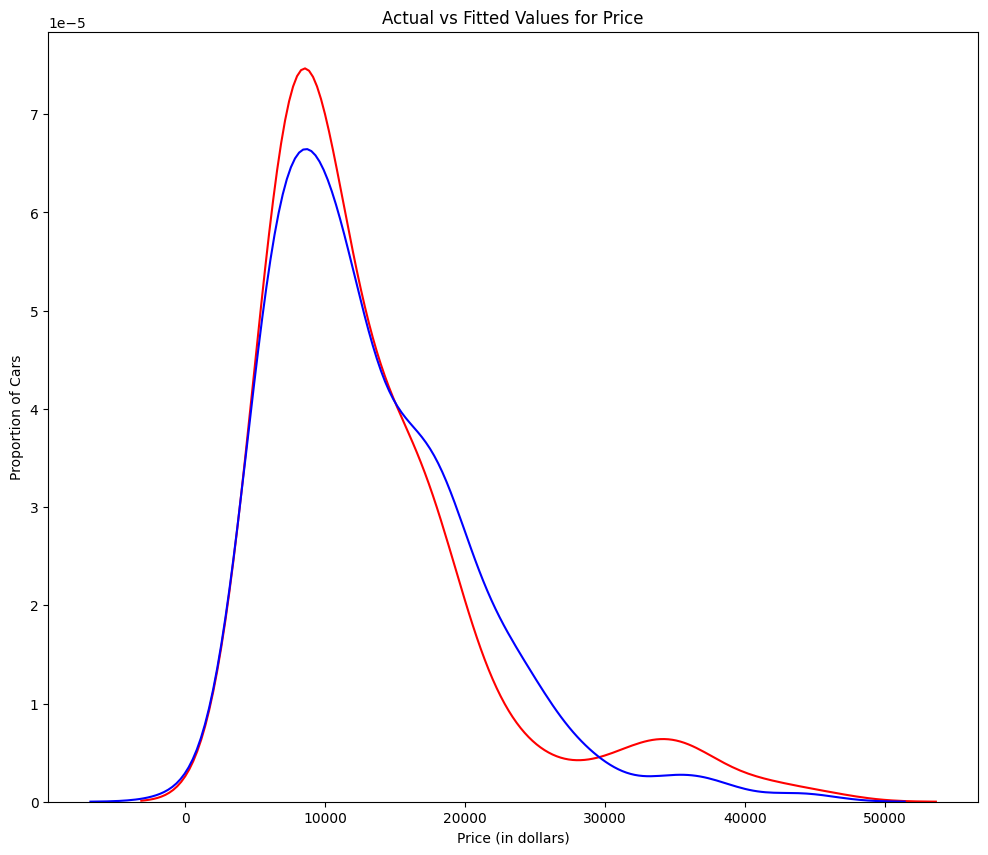

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## Polynomial Regression and Pipelines

In [ ]:
def PlotPolly(model,independent_variable,dependent_variable,Name):
  x_new=np.linspace(15,55,100)
  y_new=model(x_new)

  plt.plot(independent_variable,dependent_variable,'.',x_new,y_new,'-')
  plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
  ax=plt.gca()
  ax.set_facecolor((0.898,0.898,0.898))
  fig=plt.gcf()
  plt.xlabel(Name)
  plt.ylabel('Price of Cars')

  plt.show()
  plt.close()

In [ ]:
x=df['highway-mpg']
y=df['price']

In [ ]:
f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


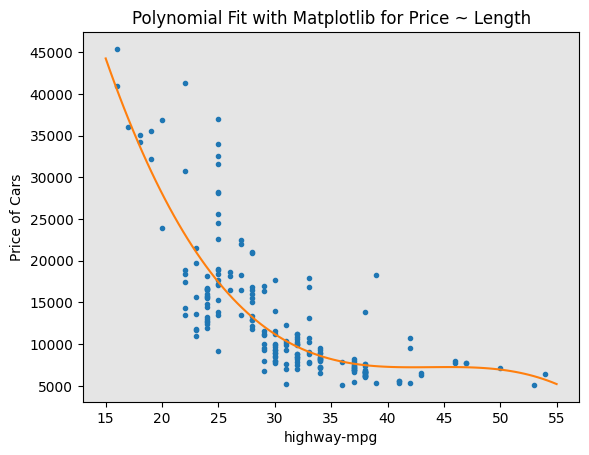

In [ ]:
PlotPolly(p,x,y,'highway-mpg')

In [ ]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

### Question 4:
Create 11 order polynomial model with the variables x and y from above.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


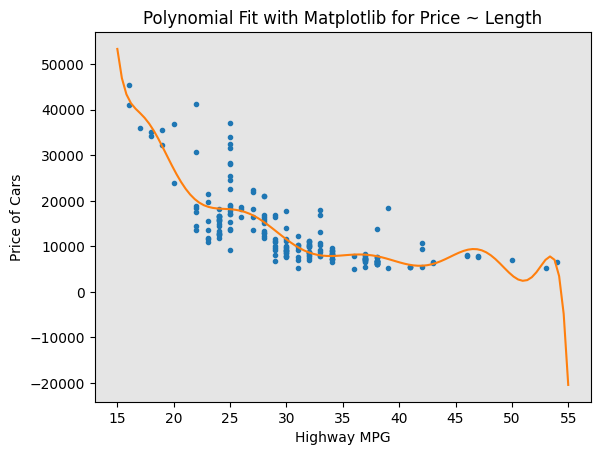

In [ ]:
f1=np.polyfit(x,y,11)
p1=np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y,'Highway MPG')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
Z_pr=pr.fit_transform(Z)

In [ ]:
Z.shape

(201, 4)

In [ ]:
Z_pr.shape

(201, 15)

## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [ ]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
Z=Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

### Question 5:
Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [ ]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# **Measures for In-Sample Evaluation**

## SLR

In [ ]:
lm.fit(X,Y)
print(lm.score(X,Y)) # R^2

0.4965911884339176


In [ ]:
Yhat=lm.predict(X)
print(Yhat[0:4])

[[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse=mean_squared_error(df['price'],Yhat)
print(mse)

31635042.944639888


### MLR

In [ ]:
lm.fit(Z,df['price'])
print(lm.score(Z,df['price']))

0.8093562806577457


In [ ]:
Y_predict_multifit=lm.predict(Z)

In [ ]:
print(mean_squared_error(df['price'],Y_predict_multifit))

11980366.87072649


### Ploynomial Fit

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_squared=r2_score(y,p(x))
print(r_squared)

0.674194666390652


In [ ]:
mean_squared_error(df['price'],p(x))

20474146.426361218

### Prediction and Decision Making

In [ ]:
new_input=np.arange(1,100,1).reshape(-1,1)

In [ ]:
lm.fit(X,Y)
lm

LinearRegression()

In [ ]:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

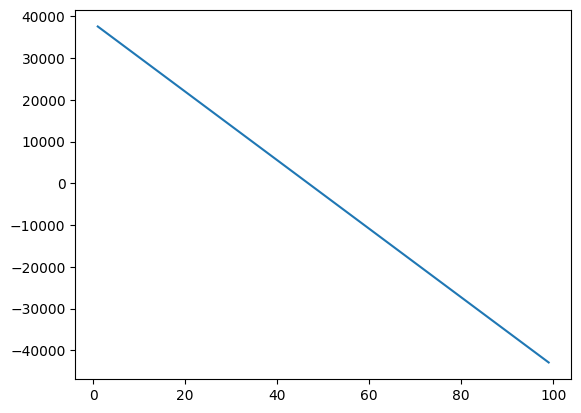

In [ ]:
plt.plot(new_input,yhat)
plt.show()

MLR model is the best fit